# Summer of Code - Artificial Intelligence

## Week 05: Machine Learning

### Day 03: Univariate Linear Regression and Gradient Descent


# Univariate Linear Regression?

**Univariate Linear Regression** is a statistical method used to model the relationship between a single independent variable (feature) and a dependent variable (target) using a linear equation.


In [381]:
import numpy as np
import matplotlib.pyplot as plt

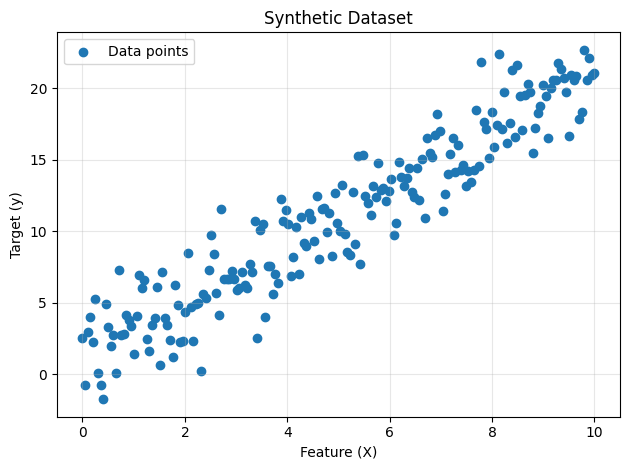

In [389]:
# Create a synthetic dataset with one feature and one target variable
X = np.linspace(0, 10, 200)
y = 2 * X + 1 + np.random.normal(0, 2, size=X.shape)
plt.scatter(X, y, label="Data points")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Synthetic Dataset")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [390]:
# Size of the Dataset
print(f"Size of X: {X.size}, Size of y: {y.size}")
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Size of X: 200, Size of y: 200
Shape of X: (200,), Shape of y: (200,)


In [391]:
# Usually, X should be a 2D array for linear regression
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Shape of X: (200, 1), Shape of y: (200, 1)


In [392]:
# Let's scale the features for better convergence
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y)

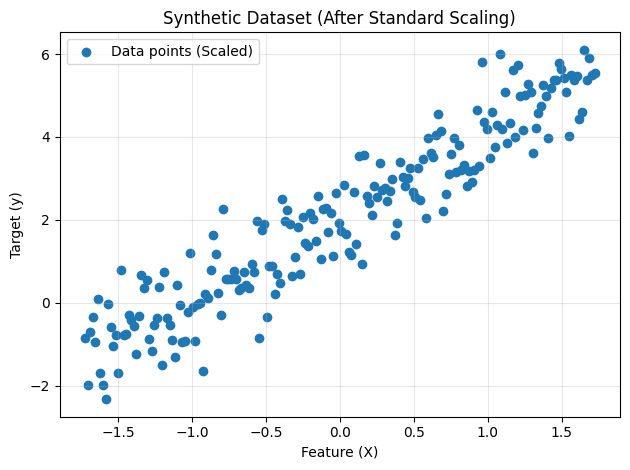

In [393]:
plt.scatter(X_scaled, y_scaled, label="Data points (Scaled)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Synthetic Dataset (After Standard Scaling)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [394]:
# Let's split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (160, 1), Testing set size: (40, 1)


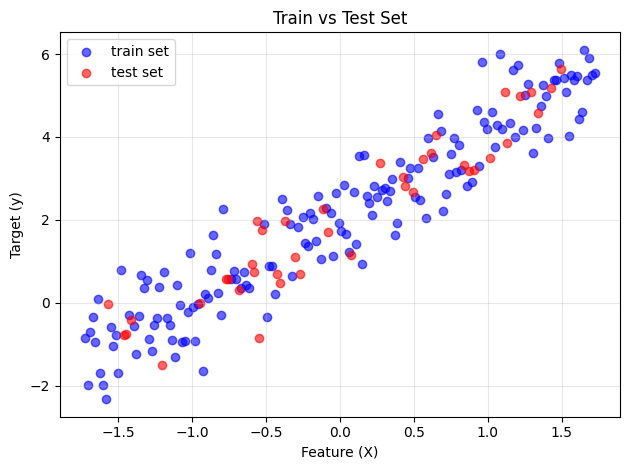

In [395]:
# Let's plot train set and test set
plt.scatter(X_train, y_train, c="blue", alpha=0.6, label="train set")
plt.scatter(X_test, y_test, c="red", alpha=0.6, label="test set")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Train vs Test Set")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Components of Linear Regression
## Hypothesis Function
The hypothesis function for univariate linear regression is a linear equation:
$$
h(x) = w_0 + w_1x
$$

Where:
- **$h(x)$**: Hypothesis function (prediction)
- **$w_0$**: Bias term (y-intercept)
- **$w_1$**: Weight (slope)
- **$x$**: Input feature

**Goal of Linear Regression**: To find the best values of **$w_0$** and **$w_1$** that minimize the difference between predicted values and actual values.

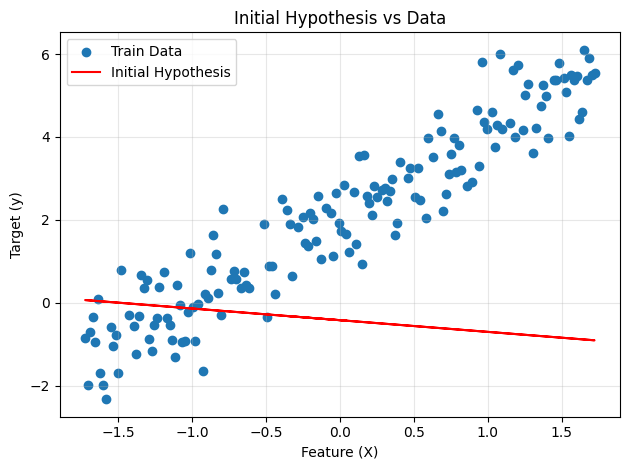

In [412]:
def hypothesis(X, w0, w1):
    return w0 + w1 * X


# Let's choose the initial values of w0 and w1
w0, w1 = np.random.randn(), np.random.randn()

# Now based on these parameters, let's calculate the predictions
predictions = hypothesis(X_train, w0, w1)
plt.scatter(X_train, y_train, label="Train Data")
plt.plot(X_train, predictions, color='red', label="Initial Hypothesis")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Initial Hypothesis vs Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Cost Function

We use the **Mean Squared Error (MSE)** to quantify this difference, and call it cost:

$$
\text{cost} = J(w_0, w_1) = (1/2m) × \sum_{i=1}^{m} (h(x^i) - y^i)^2
$$

Where:
- **$m$**: Number of training examples
- **$h(x^i)$**: Prediction for i-th example
- **$y^i$**: Actual value for i-th example


In [416]:
def compute_cost(predictions, actual):
    m = len(actual)
    cost = (1 / (2 * m)) * np.sum((predictions - actual) ** 2)
    return cost

# Calculate the initial cost
initial_cost = compute_cost(predictions, y_train)
print(f"Current Parameters: w0 = {w0:.4f}, w1 = {w1:.4f}")
print(f"Initial Cost: {initial_cost:.4f}")

Current Parameters: w0 = -0.4202, w1 = -0.2818
Initial Cost: 6.0589


In [418]:
# Test with different parameters
test_params = [(0, 0), (1, 1), (2, 2), (3, 1)]
print(f"\nCost for different parameters:")
for w0, w1 in test_params:
    pred = hypothesis(w0, w1, X_train)
    cost = compute_cost(pred, y_train)
    print(f"w0 = {w0:}, w1 = {w1}\nCost = {cost:.4f}")



Cost for different parameters:
w0 = 0, w1 = 0
Cost = 4.4754
w0 = 1, w1 = 1
Cost = 1.3503
w0 = 2, w1 = 2
Cost = 0.2616
w0 = 3, w1 = 1
Cost = 1.3981


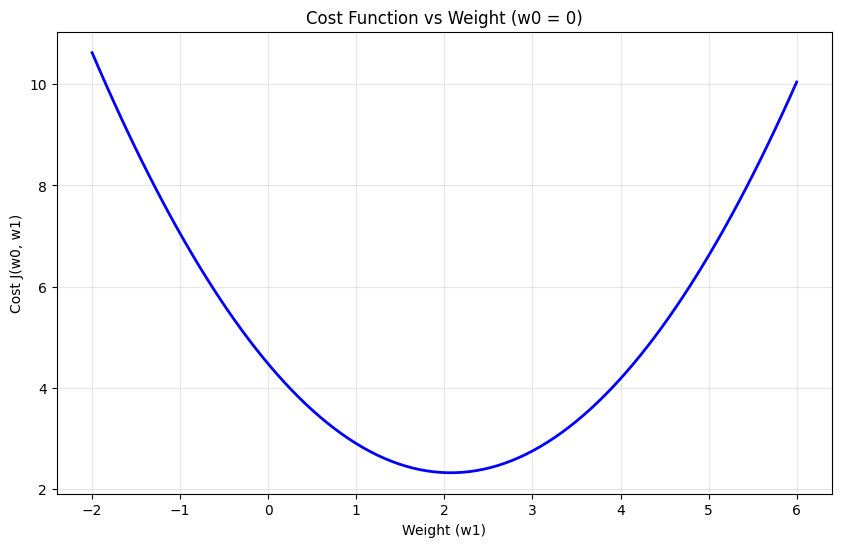

In [419]:

# Visualize cost function for different w1 values (keeping w0 = 0)
w1_range = np.linspace(-2, 6, 100)
predictions = [hypothesis(0, w1, X_train) for w1 in w1_range]
costs = [compute_cost(pred, y_train) for pred in predictions]

plt.figure(figsize=(10, 6))
plt.plot(w1_range, costs, 'b-', linewidth=2)
plt.xlabel('Weight (w1)')
plt.ylabel('Cost J(w0, w1)')
plt.title('Cost Function vs Weight (w0 = 0)')
plt.grid(True, alpha=0.3)
plt.show()


# Understanding Gradient Descent

## What is Gradient Descent?

**Gradient Descent** is an optimization algorithm used to minimize the cost function by iteratively adjusting the parameters in the direction of steepest descent.

## How Gradient Descent Works

1. **Start** with initial parameter values (w₀, w₁)
2. **Calculate** the gradient (partial derivatives)
3. **Update** parameters in the opposite direction of gradient
4. **Repeat** until convergence

# Mathematical Formulation

## Partial Derivatives:
$$∂J/∂w₀ = \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{i}) - y^{i} \right)$$
$$∂J/∂w₁ = \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{i}) - y^{i} \right) x^{i}$$


In [420]:
# Function 3: Gradient Calculation (Non-vectorized)
def compute_gradients(X, y, predictions):
    m = len(y)

    # Calculate gradients
    grad_w0 = (1 / m) * np.sum(predictions - y)
    grad_w1 = (1 / m) * np.sum((predictions - y) * X)

    return grad_w0, grad_w1


In [421]:
test_w0, test_w1 = 1, 2
pred = hypothesis(test_w0, test_w1, X_train)
grad_w0, grad_w1 = compute_gradients(pred, X_train, y_train)

print(f"Parameters: w0 = {test_w0}, w1 = {test_w1}")
print(f"Gradient w0: {grad_w0:.4f}")
print(f"Gradient w1: {grad_w1:.4f}")


Parameters: w0 = 1, w1 = 2
Gradient w0: 2.0797
Gradient w1: 5.1793


In [422]:
# Test with different parameters
test_params = [(0, 0), (1, 1), (2, 2), (3, 1)]
print(f"\nGradients for different parameters:")
for w0, w1 in test_params:
    pred = hypothesis(w0, w1, X_train)
    grad_w0, grad_w1 = compute_gradients(X_train, y_train, pred)
    print(f"w0 = {w0}, w1 = {w1} → grad_w0 = {grad_w0:.4f}, grad_w1 = {grad_w1:.4f}")



Gradients for different parameters:
w0 = 0, w1 = 0 → grad_w0 = -2.0724, grad_w1 = -2.0709
w0 = 1, w1 = 1 → grad_w0 = -1.0797, grad_w1 = -1.0272
w0 = 2, w1 = 2 → grad_w0 = -0.0871, grad_w1 = 0.0165
w0 = 3, w1 = 1 → grad_w0 = -1.0945, grad_w1 = 1.0750


## Parameter Updates:
$$
w_0 = w_0 - \alpha \frac{\partial J}{\partial w_0}
$$
$$
w_1 = w_1 - \alpha \frac{\partial J}{\partial w_1}
$$

Where $\alpha$ is the learning rate.

## Learning Rate Importance

- **Too small**: Slow convergence
- **Too large**: May overshoot the minimum
- **Just right**: Efficient convergence

In [423]:
def update_parameters(w0, w1, grad_w0, grad_w1, lr):

    new_w0 = w0 - lr * grad_w0
    new_w1 = w1 - lr * grad_w1
    
    return new_w0, new_w1


In [432]:
# Complete Gradient Descent Algorithm
def gradient_descent(
    X, y, learning_rate=0.01, num_iterations=1000, verbose=True
):
    # Initialize parameters
    w0, w1 = np.random.randn(), np.random.randn()
    m = len(X)

    # Store history for visualization
    cost_history = []
    w0_history = []
    w1_history = []

    if verbose:
        print(f"Starting Gradient Descent...")
        print(f"Learning rate: {learning_rate}")
        print(f"Number of iterations: {num_iterations}")
        print(f"Training examples: {m}")
        print("-" * 50)

    for i in range(num_iterations):
        # Calculate current cost
        pred = hypothesis(X, w0, w1)
        current_cost = compute_cost(pred, y)
        cost_history.append(current_cost)
        w0_history.append(w0)
        w1_history.append(w1)

        # Calculate gradients
        grad_w0, grad_w1 = compute_gradients(X, y, pred)

        # Update parameters
        w0, w1 = update_parameters(w0, w1, grad_w0, grad_w1, learning_rate)

        # Print progress every 100 iterations
        if verbose and (i + 1) % 10 == 0:
            print(
                f"Iteration {i+1:4d}: Cost = {current_cost:.6f}, w0 = {w0:.4f}, w1 = {w1:.4f}"
            )

    if verbose:
        print("-" * 50)
        print(f"Final parameters: w0 = {w0:.4f}, w1 = {w1:.4f}")
        print(f"Final cost: {cost_history[-1]:.6f}")

    return w0, w1, cost_history, w0_history, w1_history


In [433]:
w0_final, w1_final, cost_history, w0_history, w1_history = (
    gradient_descent(
        X_train, y_train, learning_rate=0.01, num_iterations=500
    )
)

print("Gradient descent completed successfully!")

Starting Gradient Descent...
Learning rate: 0.01
Number of iterations: 500
Training examples: 160
--------------------------------------------------
Iteration   10: Cost = 2.894014, w0 = 0.1539, w1 = 0.8047
Iteration   20: Cost = 2.410623, w0 = 0.3380, w1 = 0.9218
Iteration   30: Cost = 2.015893, w0 = 0.5045, w1 = 1.0272
Iteration   40: Cost = 1.693558, w0 = 0.6552, w1 = 1.1222
Iteration   50: Cost = 1.430336, w0 = 0.7915, w1 = 1.2077
Iteration   60: Cost = 1.215382, w0 = 0.9149, w1 = 1.2848
Iteration   70: Cost = 1.039843, w0 = 1.0265, w1 = 1.3542
Iteration   80: Cost = 0.896490, w0 = 1.1274, w1 = 1.4167
Iteration   90: Cost = 0.779418, w0 = 1.2188, w1 = 1.4731
Iteration  100: Cost = 0.683808, w0 = 1.3015, w1 = 1.5238
Iteration  110: Cost = 0.605725, w0 = 1.3763, w1 = 1.5695
Iteration  120: Cost = 0.541955, w0 = 1.4440, w1 = 1.6107
Iteration  130: Cost = 0.489873, w0 = 1.5052, w1 = 1.6478
Iteration  140: Cost = 0.447336, w0 = 1.5606, w1 = 1.6812
Iteration  150: Cost = 0.412595, w0 = 1

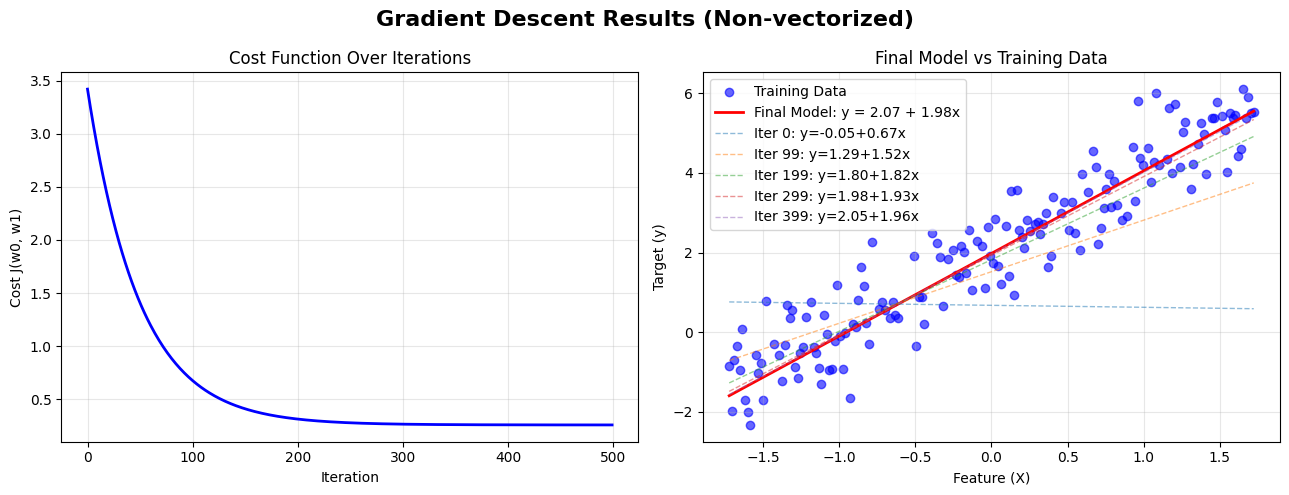

In [434]:
# Create comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Gradient Descent Results (Non-vectorized)', fontsize=16, fontweight='bold')

# Plot 1: Cost function over iterations
axes[0].plot(cost_history, 'b-', linewidth=2)
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost J(w0, w1)')
axes[0].set_title('Cost Function Over Iterations')
axes[0].grid(True, alpha=0.3)

# Plot 2: Final model vs data
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_pred = hypothesis(w0_final, w1_final, x_range)

axes[1].scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
axes[1].plot(x_range, y_pred, 'r-', linewidth=2, label=f'Final Model: y = {w0_final:.2f} + {w1_final:.2f}x')
# Plot 5 lines before the final weights are achieved
for idx in np.linspace(0, len(w0_history)-1, 6, dtype=int)[:-1]:
    y_pred_hist = hypothesis(w0_history[idx], w1_history[idx], x_range)
    axes[1].plot(x_range, y_pred_hist, '--', alpha=0.5, linewidth=1,
                 label=f'Iter {idx}: y={w0_history[idx]:.2f}+{w1_history[idx]:.2f}x')

axes[1].set_xlabel('Feature (X)')
axes[1].set_ylabel('Target (y)')
axes[1].set_title('Final Model vs Training Data')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [435]:

# Evaluate model performance
train_predictions = hypothesis(w0_final, w1_final, X_train)
test_predictions = hypothesis(w0_final, w1_final, X_test)

train_mse = np.mean((train_predictions - y_train) ** 2)
test_mse = np.mean((test_predictions - y_test) ** 2)

print(f"\nModel Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Final parameters: w0 = {w0_final:.4f}, w1 = {w1_final:.4f}")
print(f"Final cost: {cost_history[-1]:.6f}")



Model Performance:
Training MSE: 0.5356
Testing MSE: 0.3931
Final parameters: w0 = 2.0727, w1 = 1.9778
Final cost: 0.257829


# Vectorized Implementation

## Why Vectorization?

**Vectorization** uses matrix operations instead of loops, making computations much faster and more efficient.

## Mathematical Formulation (Vectorized)

### Matrix Notation:
$$
X = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m
\end{bmatrix}
\quad (m \times 2 \text{ matrix})
$$

$$
\theta =
\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}
\quad (2 \times 1 \text{ vector})
$$

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
\quad (m \times 1 \text{ vector})
$$

### Hypothesis (Vectorized):

$$
h(X) = X\theta
$$

### Cost Function (Vectorized):

$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

### Gradients (Vectorized):

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

### Parameter Update (Vectorized):

$$
\theta = \theta - \alpha \nabla J(\theta)
$$


In [436]:
# Function 6: Prepare Data for Vectorized Operations
def prepare_data_vectorized(x):

    m = len(x)
    # Add bias column (column of ones)
    X = np.column_stack([np.ones(m), x])
    return X

# Test data preparation
X_train_vectorized = prepare_data_vectorized(X_train)
X_test_vectorized = prepare_data_vectorized(X_test)

print(f"Original X_train shape: {X_train.shape}")
print(f"Vectorized X_train shape: {X_train_vectorized.shape}")
print(f"First 5 rows of vectorized X_train:")
print(X_train_vectorized[:5])

Original X_train shape: (160, 1)
Vectorized X_train shape: (160, 2)
First 5 rows of vectorized X_train:
[[ 1.         -0.35507485]
 [ 1.          1.68877065]
 [ 1.         -1.06522456]
 [ 1.         -1.30771471]
 [ 1.          0.3897163 ]]


In [437]:
# Function 7: Vectorized Hypothesis Function
def hypothesis_vectorized(X, theta):
    pred = X @ theta
    return pred.reshape(-1, 1)


theta = np.array([1, 2])  # [w0, w1]
test_predictions = hypothesis_vectorized(X_train_vectorized, theta)

print(f"Parameters: theta = {theta}")
print(f"Predictions shape: {test_predictions.shape}")
print(f"First 5 predictions: {test_predictions[:5]}")

Parameters: theta = [1 2]
Predictions shape: (160, 1)
First 5 predictions: [[ 0.28985029]
 [ 4.37754129]
 [-1.13044912]
 [-1.61542941]
 [ 1.77943261]]


In [438]:
# Function 8: Vectorized Cost Function
def cost_function_vectorized(predictions, actual):

    m = len(actual)
    cost = (1 / (2 * m)) * np.sum((predictions - actual) ** 2)
    return cost

# Test vectorized cost function
print("=== Testing Vectorized Cost Function ===")
theta = np.array([1, 2])
predictions = hypothesis_vectorized(X_train_vectorized, theta)
vectorized_cost = cost_function_vectorized(predictions, y_train)

print(f"Parameters: theta = {theta}")
print(f"Vectorized cost: {vectorized_cost:.6f}")



=== Testing Vectorized Cost Function ===
Parameters: theta = [1 2]
Vectorized cost: 0.848705


In [439]:
# Function 9: Vectorized Gradient Calculation
def compute_gradients_vectorized(X, pred, actual):

    m = len(actual)
    gradients = (1 / m) * X.T @ (pred - actual)
    return gradients.flatten()

theta = np.array([1, 2])
predictions = hypothesis_vectorized(X_train_vectorized, theta)
vectorized_gradients = compute_gradients_vectorized(X_train_vectorized, predictions, y_train)
print(f"Parameters: theta = {theta}")
print(f"Vectorized gradients: {vectorized_gradients}")


Parameters: theta = [1 2]
Vectorized gradients: [-1.087094    0.02390276]


In [440]:
def update_parameters_vectorized(theta, gradients, lr):
    new_theta = theta - lr * gradients
    return new_theta

In [441]:
# Function 10: Complete Vectorized Gradient Descent
def gradient_descent_vectorized(
    X, y, learning_rate=0.01, num_iterations=100, verbose=True
):

    # Initialize parameters
    theta = np.random.randn(2)  # [w0, w1]
    m = len(y)

    # Store history for visualization
    cost_history = []
    theta_history = []

    if verbose:
        print(f"Starting Vectorized Gradient Descent...")
        print(f"Learning rate: {learning_rate}")
        print(f"Number of iterations: {num_iterations}")
        print(f"Training examples: {m}")
        print("-" * 50)

    for i in range(num_iterations):
        # Calculate current cost
        pred = hypothesis_vectorized(X, theta)
        current_cost = cost_function_vectorized(pred, y)
        cost_history.append(current_cost)
        theta_history.append(theta.copy())

        # Calculate gradients
        gradients = compute_gradients_vectorized(X, pred, y)

        # Update parameters
        theta = update_parameters_vectorized(theta, gradients, learning_rate)

        # Print progress every 100 iterations
        if verbose and (i + 1) % 100 == 0:
            print(
                f"Iteration {i+1:4d}: Cost = {current_cost:.6f}, theta = [{theta[0]:.4f}, {theta[1]:.4f}]"
            )

    if verbose:
        print("-" * 50)
        print(f"Final parameters: theta = [{theta[0]:.4f}, {theta[1]:.4f}]")
        print(f"Final cost: {cost_history[-1]:.6f}")

    return theta, cost_history, theta_history


# Test vectorized gradient descent
print("=== Testing Vectorized Gradient Descent ===")
theta_final, cost_history_vec, theta_history_vec = gradient_descent_vectorized(
    X_train_vectorized, y_train, learning_rate=0.01, num_iterations=1000
)

print("Vectorized gradient descent completed successfully!")

=== Testing Vectorized Gradient Descent ===
Starting Vectorized Gradient Descent...
Learning rate: 0.01
Number of iterations: 1000
Training examples: 160
--------------------------------------------------
Iteration  100: Cost = 1.133584, theta = [0.9078, 1.4193]
Iteration  200: Cost = 0.374149, theta = [1.6539, 1.7851]
Iteration  300: Cost = 0.273195, theta = [1.9279, 1.9143]
Iteration  400: Cost = 0.259762, theta = [2.0286, 1.9599]
Iteration  500: Cost = 0.257973, theta = [2.0655, 1.9760]
Iteration  600: Cost = 0.257735, theta = [2.0791, 1.9817]
Iteration  700: Cost = 0.257703, theta = [2.0841, 1.9838]
Iteration  800: Cost = 0.257699, theta = [2.0859, 1.9845]
Iteration  900: Cost = 0.257698, theta = [2.0866, 1.9847]
Iteration 1000: Cost = 0.257698, theta = [2.0868, 1.9848]
--------------------------------------------------
Final parameters: theta = [2.0868, 1.9848]
Final cost: 0.257698
Vectorized gradient descent completed successfully!


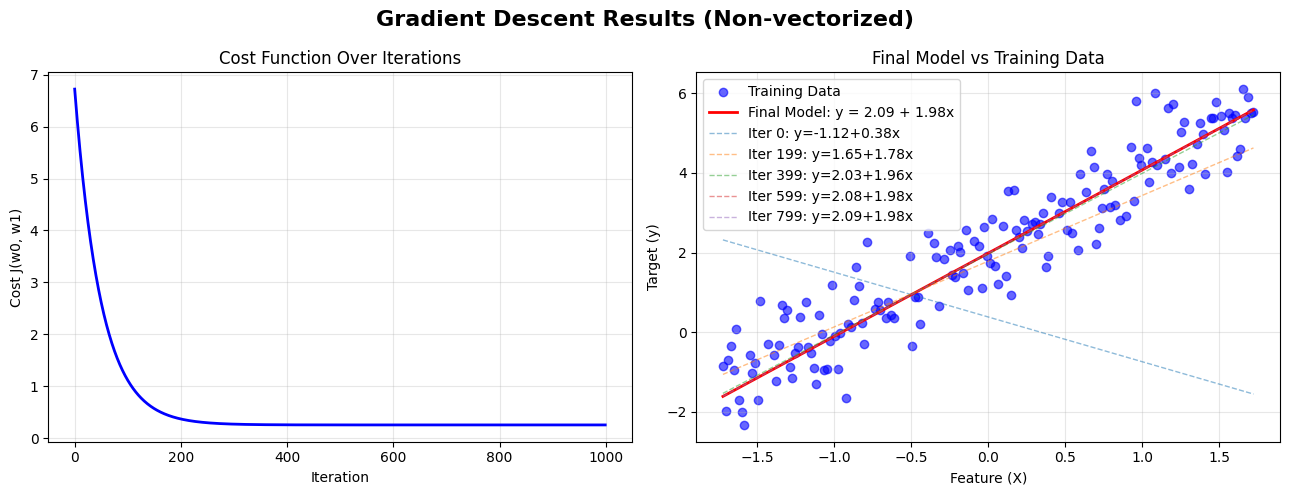

In [442]:
# Create comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(
    "Gradient Descent Results (Non-vectorized)", fontsize=16, fontweight="bold"
)

# Plot 1: Cost function over iterations
axes[0].plot(cost_history_vec, "b-", linewidth=2)
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Cost J(w0, w1)")
axes[0].set_title("Cost Function Over Iterations")
axes[0].grid(True, alpha=0.3)

# Plot 2: Final model vs data
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_pred = hypothesis(theta_final[0], theta_final[1], x_range)

axes[1].scatter(X_train, y_train, alpha=0.6, color="blue", label="Training Data")
axes[1].plot(
    x_range,
    y_pred,
    "r-",
    linewidth=2,
    label=f"Final Model: y = {theta_final[0]:.2f} + {theta_final[1]:.2f}x",
)
# Plot 5 lines before the final weights are achieved
for idx in np.linspace(0, len(theta_history_vec) - 1, 6, dtype=int)[:-1]:
    y_pred_hist = hypothesis(theta_history_vec[idx][0], theta_history_vec[idx][1], x_range)
    axes[1].plot(
        x_range,
        y_pred_hist,
        "--",
        alpha=0.5,
        linewidth=1,
        label=f"Iter {idx}: y={theta_history_vec[idx][0]:.2f}+{theta_history_vec[idx][1]:.2f}x",
    )

axes[1].set_xlabel("Feature (X)")
axes[1].set_ylabel("Target (y)")
axes[1].set_title("Final Model vs Training Data")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [445]:
# Evaluate the trained linear regression model on the test set
test_set_predictions = hypothesis(theta_final[0], theta_final[1], X_test)
test_set_mse = np.mean((test_set_predictions - y_test) ** 2)

print(f"Test set MSE: {test_set_mse:.4f}")
print(f"Trained parameters: w0 = {theta_final[0]:.4f}, w1 = {theta_final[1]:.4f}")

Test set MSE: 0.3934
Trained parameters: w0 = 2.0868, w1 = 1.9848
